In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
airdf = pd.read_csv('Measurement_summary.csv')
airdf.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73,57
1,2017-01-01 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71,59
2,2017-01-01 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,59
3,2017-01-01 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,58
4,2017-01-01 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69,61


In [27]:
date_time = airdf['Measurement date'].str.split(' ', n=1, expand=True)
airdf = airdf.drop(['Measurement date'], axis=1)
date_time.head()

,0,1
0,2017-01-01,0:00
1,2017-01-01,1:00
2,2017-01-01,2:00
3,2017-01-01,3:00
4,2017-01-01,4:00


In [28]:
airdf['date'] = date_time[0]
date_time[1] = date_time[1].str.split(':', n=1, expand=True)
airdf['time'] = date_time[1]
airdf['time'] = airdf['time'].astype('int')
airdf.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73,57,2017-01-01,0
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71,59,2017-01-01,1
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,59,2017-01-01,2
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70,58,2017-01-01,3
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69,61,2017-01-01,4


In [29]:
# groupby date
airdf_date = airdf.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
airdf_date.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


### TIME CORRELATION 

In [30]:
airdf_time = airdf.groupby(['time'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
airdf_time

,time,SO2,NO2,O3,CO,PM10,PM2.5
0,0,-0.001909,0.024584,0.011626,0.529891,41.944368,24.651817
1,1,-0.002126,0.021533,0.012065,0.524424,40.927181,24.091507
2,2,-0.002047,0.019609,0.012448,0.516841,40.558962,24.103003
3,3,-0.002203,0.018209,0.012198,0.509860,39.303351,23.577686
4,4,-0.002267,0.018247,0.011033,0.507101,39.394380,23.785717
5,5,-0.002303,0.020649,0.008226,0.515338,39.018339,23.413360
6,6,-0.001988,0.025026,0.005753,0.536940,40.044229,23.788876
7,7,-0.001966,0.027204,0.005840,0.562405,40.911421,23.670649
8,8,-0.001507,0.028721,0.008698,0.576376,43.231577,24.484415
9,9,-0.001398,0.027778,0.014076,0.559335,44.089890,24.593978


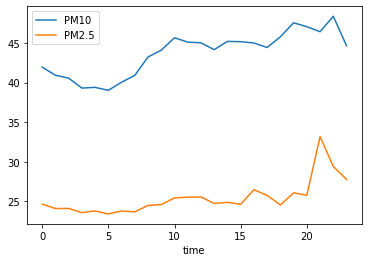

In [31]:
airdf_time.plot(x='time', y= ['PM10','PM2.5'])

## 결과 분석

[]

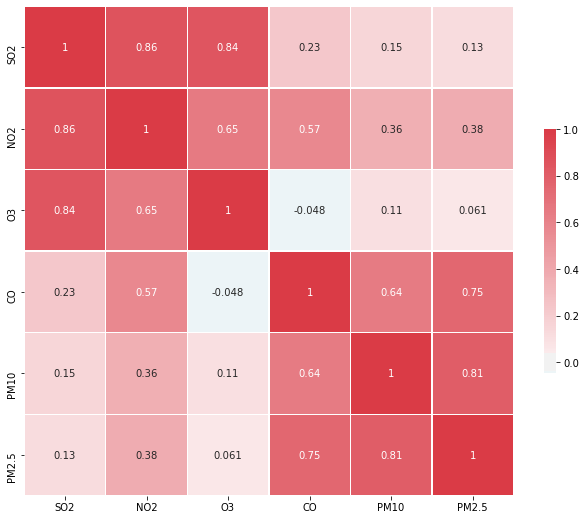

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(airdf_date.corr(), cmap=cmap, annot=True, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.plot()

[]

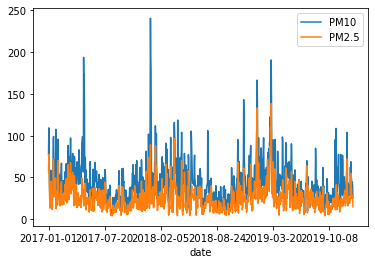

In [33]:

airdf_date.plot(x='date', y= ['PM10','PM2.5'])
plt.plot()

[]

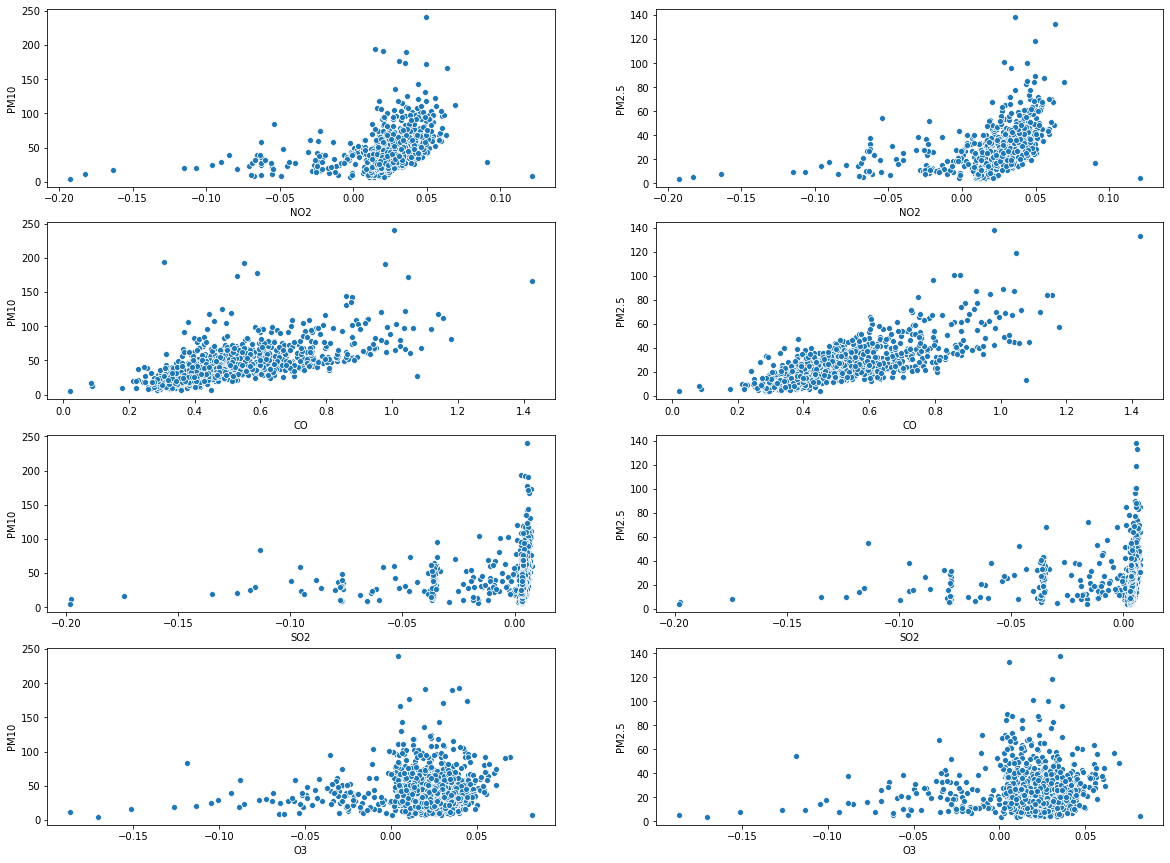

In [34]:
f, ax = plt.subplots(4, 2, figsize=(20,15))
sns.scatterplot(x='NO2', y= 'PM10', data=airdf_date, ax=ax[0,0])
sns.scatterplot(x='NO2', y= 'PM2.5', data=airdf_date, ax=ax[0,1])
sns.scatterplot(x='CO', y= 'PM10', data=airdf_date, ax=ax[1,0])
sns.scatterplot(x='CO', y= 'PM2.5', data=airdf_date, ax=ax[1,1])
sns.scatterplot(x='SO2', y= 'PM10', data=airdf_date, ax=ax[2,0])
sns.scatterplot(x='SO2', y= 'PM2.5', data=airdf_date, ax=ax[2,1])
sns.scatterplot(x='O3', y= 'PM10', data=airdf_date, ax=ax[3,0])
sns.scatterplot(x='O3', y= 'PM2.5', data=airdf_date, ax=ax[3,1])
plt.plot()
# 상관계수가 높은 NO2, CO의 경우 농도에 따라 대기오염이 상승하는 경향을 보여준다.

### 대기오염은 CO, NO2에 영향을 받는 것을 알 수 있었고 특히 CO는 대기오염에 많은 영향을 끼치며 높은 상관관계를 보이는 것을 알 수 있었다.

### TIME CORRELATION

[]

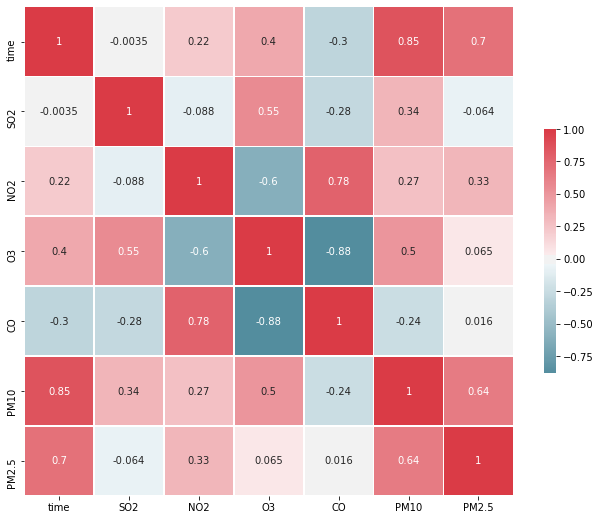

In [35]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(airdf_time.corr(), cmap=cmap, annot=True, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.plot()

In [36]:
airdf_time.corr()

,time,SO2,NO2,O3,CO,PM10,PM2.5
time,1.000000,-0.003464,0.215810,0.398308,-0.297497,0.854971,0.697680
SO2,-0.003464,1.000000,-0.087513,0.551669,-0.277118,0.336001,-0.064059
NO2,0.215810,-0.087513,1.000000,-0.603303,0.775535,0.268708,0.326818
O3,0.398308,0.551669,-0.603303,1.000000,-0.884175,0.502661,0.065166
CO,-0.297497,-0.277118,0.775535,-0.884175,1.000000,-0.239810,0.016262
PM10,0.854971,0.336001,0.268708,0.502661,-0.239810,1.000000,0.640941
PM2.5,0.697680,-0.064059,0.326818,0.065166,0.016262,0.640941,1.000000


[]

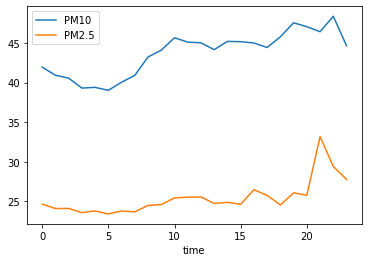

In [37]:
airdf_time.plot(x='time', y= ['PM10','PM2.5'])
plt.plot()
# 시간에 따라 PM10, PM2.5가 상승하는 경향을 볼 수 있다.

[]

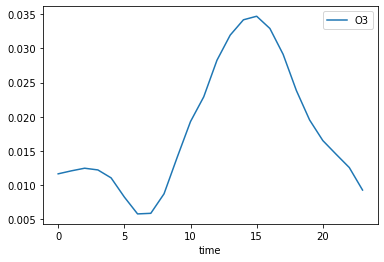

In [38]:
airdf_time.plot(x='time', y= 'O3')
plt.plot()
# 15시경을 중심으로 O3의 농도가 짙어지는 경향을 볼 수 있다.

[]

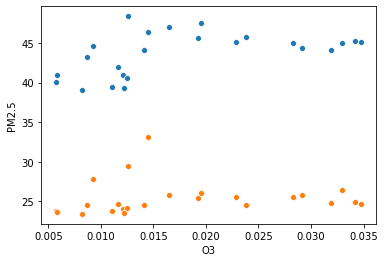

In [39]:
# 시간에 따라 대기오염이 상승하는 상관관계를 확인할 수 있었다.
# 그러나 시간에 따라 오존이 변하는 것은 대기오염에 영향을 줄 것이라고 생각했으나 직접적인 영향은 확인할 수 없었다.

sns.scatterplot(x='O3', y= 'PM10', data=airdf_time)
sns.scatterplot(x='O3', y= 'PM2.5', data=airdf_time)
plt.plot()
# O3의 농도에 따른 대기오염의 영향은 미미한 것으로 판단된다.

[]

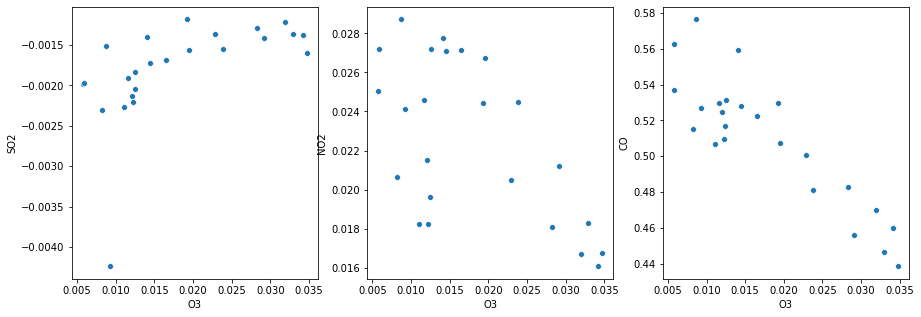

In [46]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x='O3', y= 'SO2', data=airdf_time, ax=ax[0])
sns.scatterplot(x='O3', y= 'NO2', data=airdf_time, ax=ax[1])
sns.scatterplot(x='O3', y= 'CO', data=airdf_time, ax=ax[2])
plt.plot()

### 그러나 O3는 SO2, NO2, CO와 높은 상관관계를 보이며 경향성을 보여주는 것으로 판단된다.
### 즉 O3는 대기오염에 직접적인 영향을 주는 것처럼 보이진 않지만 SO2, NO2, CO에 영향을 주어 간접적으로 대기오염에 영향을 미치는 것으로 판단된다.
### 결론적으로, 대기오염은 시간의 흐름에 따른 상관관계를 갖는다. 시간은 O3의 농도와 상관성이 높으며 O3는 직접적으로 대기오염에 관여하기보다는 SO2, NO2, CO와의 화학작용을 통해 간접적으로  대기오염에 영향을 준다고 보여진다.